In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import Zbox as zb

/Users/hartevel/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
import rstoolbox as rs
rs.utils.format_Ipython()

In [15]:
tags = ['description', 'score', 'ddg', 'shapecomp', 'delta_unsatHbonds', 'hbonds_int', 'dSASA_hphobic']

definitions = {
    "scores": "*", 
    "sequence" : "B"
              }

In [16]:
bs = rs.io.parse_rosetta_file('../baseline/baseline.silent', definitions)
bs.add_reference('B', sequence=bs['sequence_B'].tolist()[0])
bs = bs.identify_mutants('B')

In [17]:
bs[tags]

,description,score,ddg,shapecomp,delta_unsatHbonds,hbonds_int,dSASA_hphobic
0,acrIIc1_sauCas9hnh_motali_0001,-532.431,-21.32,0.525,21.0,4.0,677.151


## Analysis

In [18]:
# Generate wildtype frame
residue_map = ['2', '14', '35', '42', '44', '45', '46', '47', '76']
l = []
for r in residue_map:
    n = bs.copy()
    residue = str(int(r)+1)
    target = n['sequence_B'].str[int(r)-1].tolist()[0]
    desc = target+residue+target
    n['residue'] = [residue]
    n['target'] = [target]
    n['mutation'] = [desc]
    l.append(n)
    
bss = pd.concat(l)

In [19]:
# Create rectangle map for wt positions
alphabet_map = ['C', 'M', 'G', 'P', 'A', 'V', 'L', 'I', 'W', 'F', 'Y', 'T', 'S', 'N', 'Q', 'D', 'E', 'H', 'K', 'R']
residue_map = ['2', '14', '35', '42', '44', '45', '46', '47', '76']
residue_map = [str(int(r)+1) for r in residue_map]
selection = [
    ('3', 'N'), 
    ('15', 'D'),
    ('36', 'R'), 
    ('43', 'D'),
    ('45', 'D'),
    ('46', 'D'),
    ('47', 'K'),
    ('48', 'A'),
    ('77', 'M'),
]
rectangle_map = []
for s in selection:
    i = alphabet_map.index(s[1])
    j = residue_map.index(s[0])
    rectangle_map.append([i, j])
    
    
# Create selection rectangle
selection = [
    ('3', 'F'),
    ('3', 'Y'),
    ('15', 'Q'),
    ('36', 'D'), 
    ('43', 'F'),
    ('45', 'F'),
    ('46', 'E'),
    ('47', 'Q'),
    ('48', 'I'),
    ('77', 'S'),
]
rectangle_map2 = []
for s in selection:
    i = alphabet_map.index(s[1])
    j = residue_map.index(s[0])
    rectangle_map2.append([i, j])

In [25]:
ss = rs.io.parse_rosetta_file('singletons/single_all.silent', definitions)#.drop_duplicates('sequence_B')

ss.add_reference('B', sequence=bs['sequence_B'].tolist()[0])
ss = ss.identify_mutants('B')
#ss = ss[ss['ddg'] < -22.]
#ss = pd.concat([ss, bs])

ss['description'] = ss['description'].str.replace('des_', '')
def cleaner(row):
    desc = row['description'].split('.')[0][0:-1]
    tag = desc[1:-1]
    target = desc[-1]
    # we need to add 1 match the real sequence numbering
    tag = str(int(tag)+1)
    a = desc[0]
    b = desc[-1]
    desc = a+str(tag)+b
    return desc, tag, target
ss[['mutation', 'residue', 'target']] = ss.apply(cleaner, axis=1, result_type='expand')
ss = pd.concat([ss, bss])
sss = ss2.set_index(['residue', 'mutation'])

sss[tags]

/Users/hartevel/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



description    score  \
residue mutation                                                             
48      A48M      A47M_.A47M_.acrIIc1_sauCas9hnh_motali_0001_0001 -504.136   
        A48V      A47V_.A47V_.acrIIc1_sauCas9hnh_motali_0001_0001 -533.970   
43      D43D      D42D_.D42D_.acrIIc1_sauCas9hnh_motali_0001_0001 -536.185   
        D43E      D42E_.D42E_.acrIIc1_sauCas9hnh_motali_0001_0001 -536.940   
45      D45E      D44E_.D44E_.acrIIc1_sauCas9hnh_motali_0001_0001 -533.951   
        D45S      D44S_.D44S_.acrIIc1_sauCas9hnh_motali_0001_0001 -534.169   
        D45T      D44T_.D44T_.acrIIc1_sauCas9hnh_motali_0001_0001 -534.436   
46      D46S      D45S_.D45S_.acrIIc1_sauCas9hnh_motali_0001_0001 -529.166   
        D46T      D45T_.D45T_.acrIIc1_sauCas9hnh_motali_0001_0001 -522.394   
47      K47Y      K46Y_.K46Y_.acrIIc1_sauCas9hnh_motali_0001_0001 -535.177   
77      M77G      M76G_.M76G_.acrIIc1_sauCas9hnh_motali_0001_0001 -540.104   
        M77T      M76T_.M76T_.acrIIc1_sauCas9hnh_motali_0001_0001 -537.361   
48      A48F      A47F_.acrIIc1_sauCas9hnh_motali_0001            -523.197   
        A48I      A47I_.acrIIc1_sauCas9hnh_motali_0001            -520.062   
        A48L      A47L_.acrIIc1_sauCas9hnh_motali_0001            -523.765   
15      D15E      D14E_.acrIIc1_sauCas9hnh_motali_0001            -526.503   
        D15N      D14N_.acrIIc1_sauCas9hnh_motali_0001            -533.650   
        D15Q      D14Q_.acrIIc1_sauCas9hnh_motali_0001            -525.059   
        D15Y      D14Y_.acrIIc1_sauCas9hnh_motali_0001            -531.459   
43      D43F      D42F_.acrIIc1_sauCas9hnh_motali_0001            -539.240   
        D43W      D42W_.acrIIc1_sauCas9hnh_motali_0001            -511.168   
        D43Y      D42Y_.acrIIc1_sauCas9hnh_motali_0001            -533.988   
45      D45F      D44F_.acrIIc1_sauCas9hnh_motali_0001            -536.153   
        D45W      D44W_.acrIIc1_sauCas9hnh_motali_0001            -535.118   
        D45Y      D44Y_.acrIIc1_sauCas9hnh_motali_0001            -536.180   
46      D46E      D45E_.acrIIc1_sauCas9hnh_motali_0001            -533.837   
        D46K      D45K_.acrIIc1_sauCas9hnh_motali_0001            -518.147   
        D46N      D45N_.acrIIc1_sauCas9hnh_motali_0001            -533.167   
        D46Q      D45Q_.acrIIc1_sauCas9hnh_motali_0001            -527.821   
        D46R      D45R_.acrIIc1_sauCas9hnh_motali_0001            -501.225   
47      K47D      K46D_.acrIIc1_sauCas9hnh_motali_0001            -536.588   
        K47E      K46E_.acrIIc1_sauCas9hnh_motali_0001            -534.541   
        K47N      K46N_.acrIIc1_sauCas9hnh_motali_0001            -536.416   
        K47Q      K46Q_.acrIIc1_sauCas9hnh_motali_0001            -539.616   
77      M77A      M76A_.acrIIc1_sauCas9hnh_motali_0001            -542.538   
        M77D      M76D_.acrIIc1_sauCas9hnh_motali_0001            -534.013   
        M77I      M76I_.acrIIc1_sauCas9hnh_motali_0001            -529.506   
        M77L      M76L_.acrIIc1_sauCas9hnh_motali_0001            -539.282   
        M77Q      M76Q_.acrIIc1_sauCas9hnh_motali_0001            -536.269   
        M77S      M76S_.acrIIc1_sauCas9hnh_motali_0001            -540.111   
        M77V      M76V_.acrIIc1_sauCas9hnh_motali_0001            -532.111   
3       N3F       N2F_.acrIIc1_sauCas9hnh_motali_0001             -531.784   
        N3I       N2I_.acrIIc1_sauCas9hnh_motali_0001             -510.824   
        N3L       N2L_.acrIIc1_sauCas9hnh_motali_0001             -530.751   
        N3W       N2W_.acrIIc1_sauCas9hnh_motali_0001             -530.972   
        N3Y       N2Y_.acrIIc1_sauCas9hnh_motali_0001             -531.768   
36      R36D      R35D_.acrIIc1_sauCas9hnh_motali_0001            -530.090   
        R36E      R35E_.acrIIc1_sauCas9hnh_motali_0001            -530.367   
        R36F      R35F_.acrIIc1_sauCas9hnh_motali_0001            -528.232   
        R36W      R35W_.acrIIc1_sauCas9hnh_motali_0001            -516.168  

In [26]:
ss.shape

(60, 58)

In [27]:
alphabet_map = ['C', 'M', 'G', 'P', 'A', 'V', 'L', 'I', 'W', 'F', 'Y', 'T', 'S', 'N', 'Q', 'D', 'E', 'H', 'K', 'R']
residue_map = ['2', '14', '35', '42', '44', '45', '46', '47', '76']
residue_map = [str(int(r)+1) for r in residue_map] # ['3', '15', '36', '43', '45', '46', '47', '48', '77']


mat_score = ss[['residue', 'target', 'score']].pivot_table('score', 'target', 'residue').loc[alphabet_map][residue_map]
mat_ddg = ss[['residue', 'target', 'ddg']].pivot_table('ddg', 'target', 'residue').loc[alphabet_map][residue_map]
mat_sc = ss[['residue', 'target', 'shapecomp']].pivot_table('shapecomp', 'target', 'residue').loc[alphabet_map][residue_map]
mat_uhb = ss[['residue', 'target', 'delta_unsatHbonds']].pivot_table('delta_unsatHbonds', 'target', 'residue').loc[alphabet_map][residue_map]
mat_hbond = ss[['residue', 'target', 'hbonds_int']].pivot_table('hbonds_int', 'target', 'residue').loc[alphabet_map][residue_map]
mat_hphobic = ss[['residue', 'target', 'dSASA_hphobic']].pivot_table('dSASA_hphobic', 'target', 'residue').loc[alphabet_map][residue_map]

/Users/hartevel/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/Users/hartevel/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/Users/hartevel/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/inde

In [28]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})

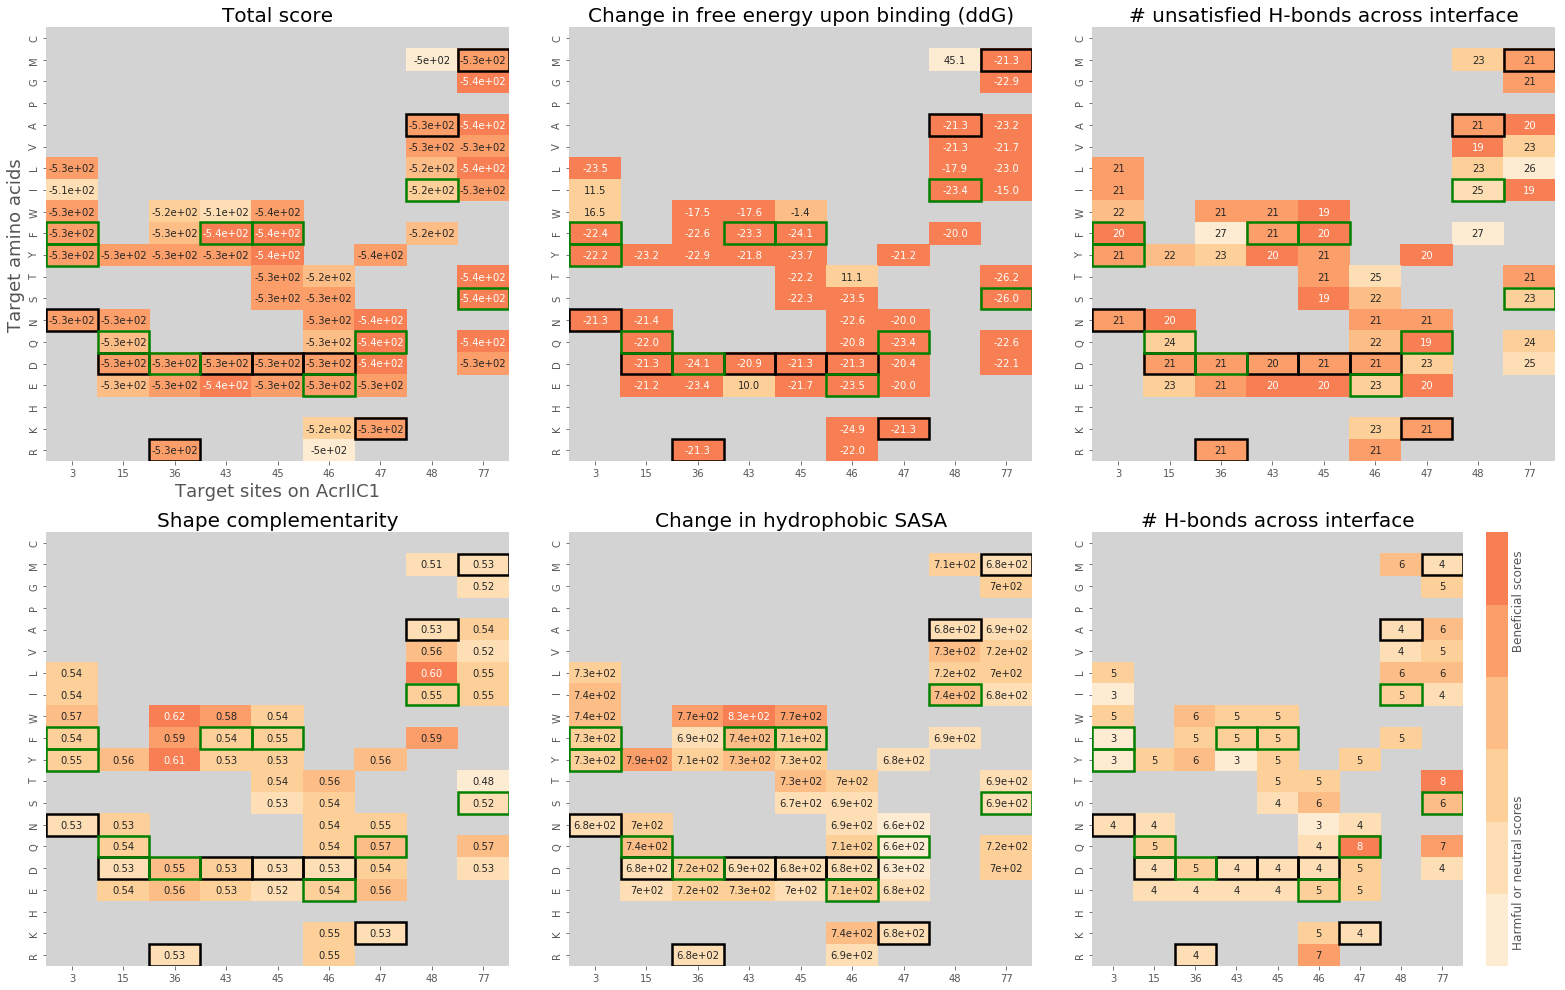

In [34]:
fig = plt.figure(figsize=[22, 14])
grid = (2, 3)
ax1 = plt.subplot2grid(grid, (0, 0))
ax2 = plt.subplot2grid(grid, (0, 1), sharex=ax1, sharey=ax1)
ax3 = plt.subplot2grid(grid, (0, 2), sharex=ax1, sharey=ax1)
ax4 = plt.subplot2grid(grid, (1, 0), sharex=ax1, sharey=ax1)
ax5 = plt.subplot2grid(grid, (1, 1), sharex=ax1, sharey=ax1)
ax6 = plt.subplot2grid(grid, (1, 2), sharex=ax1, sharey=ax1)

#ax4 = plt.subplot2grid(grid, (1, 0), fig=fig, colspan=3)
cmap = sns.color_palette("OrRd", 10)[:6]#sns.diverging_palette(220, 20, n=7)
cmapr = sns.color_palette("OrRd_r", 10)[4:]
cbar_kws = {'format': '%.0f%%', 'ticks': [0, 100], 'label': 'Harmful or neutral scores                                     Beneficial scores'}

## Reverse cmap, i.e. lower scores are good
g = sns.heatmap(mat_score, cmap=cmapr, annot=True, ax=ax1, cbar=False)
g.set_facecolor('lightgrey')
for e in rectangle_map:
    ax1.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='black', lw=2.5))
for e in rectangle_map2:
    ax1.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='green', lw=2.5))    
#rectangle_score = get_boundary(mat_ddg_full, residue_map, alphabet_map_full, bound='min')
#for e in rectangle_score:
    #ax1.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='red', lw=5)) 
ax1.set_title('Total score', fontsize=20)
ax1.set_ylabel('Target amino acids', fontsize=18)
ax1.set_xlabel('Target sites on AcrIIC1', fontsize=18)

g = sns.heatmap(mat_ddg, cmap=cmapr, annot=True, ax=ax2, cbar=False, fmt=".1f")
g.set_facecolor('lightgrey')
for e in rectangle_map:
    ax2.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='black', lw=2.5))
for e in rectangle_map2:
    ax2.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='green', lw=2.5))    
#rectangle_score = get_boundary(mat_ddg_full, residue_map, alphabet_map_full, bound='min')
#for e in rectangle_score:
    #ax1.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='red', lw=5)) 
ax2.set_title('Change in free energy upon binding (ddG)', fontsize=20)
ax2.set_ylabel('')
ax2.set_xlabel('')

g = sns.heatmap(mat_uhb, cmap=cmapr, annot=True, ax=ax3, cbar=False) #cbar_kws=cbar_kws
g.set_facecolor('lightgrey')
for e in rectangle_map:
    ax3.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='black', lw=2.5))
for e in rectangle_map2:
    ax3.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='green', lw=2.5))    
#rectangle_score = get_boundary(mat_ddg_full, residue_map, alphabet_map_full, bound='min')
#for e in rectangle_score:
    #ax1.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='red', lw=5)) 
ax3.set_title('# unsatisfied H-bonds across interface', fontsize=20)
ax3.set_ylabel('')
ax3.set_xlabel('')

## Forward heatmaps, i.e. higher scores are good
g = sns.heatmap(mat_sc, cmap=cmap, annot=True, ax=ax4, cbar=False, fmt=".2f")
g.set_facecolor('lightgrey')
for e in rectangle_map:
    ax4.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='black', lw=2.5))
for e in rectangle_map2:
    ax4.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='green', lw=2.5))
#rectangle_score = get_boundary(mat_sc_full, residue_map, alphabet_map_full, bound='max')
#for e in rectangle_score:
#    ax2.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='red', lw=5)) 
ax4.set_title('Shape complementarity', fontsize=20)
ax4.set_ylabel('')
ax4.set_xlabel('')


g = sns.heatmap(mat_hphobic, cmap=cmap, annot=True, ax=ax5, cbar=False)
g.set_facecolor('lightgrey')
for e in rectangle_map:
    ax5.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='black', lw=2.5))
for e in rectangle_map2:
    ax5.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='green', lw=2.5))
#rectangle_score = get_boundary(mat_uhb_full, residue_map, alphabet_map_full, bound='min')
#for e in rectangle_score:
#    ax3.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='red', lw=5)) 
ax5.set_title('Change in hydrophobic SASA', fontsize=20)
ax5.set_ylabel('')
ax5.set_xlabel('')

g = sns.heatmap(mat_hbond, cmap=cmap, annot=True, ax=ax6, cbar=True, cbar_kws=cbar_kws,)
g.set_facecolor('lightgrey')
for e in rectangle_map:
    ax6.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='black', lw=2.5))
for e in rectangle_map2:
    ax6.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='green', lw=2.5))
#rectangle_score = get_boundary(mat_uhb_full, residue_map, alphabet_map_full, bound='min')
#for e in rectangle_score:
#    ax3.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='red', lw=5)) 
ax6.set_title('# H-bonds across interface', fontsize=20) 
ax6.set_ylabel('')
ax6.set_xlabel('')

plt.tight_layout()

plt.savefig('/Users/hartevel/Desktop/maps.svg', dpi=300, transparent=False)
plt.show()

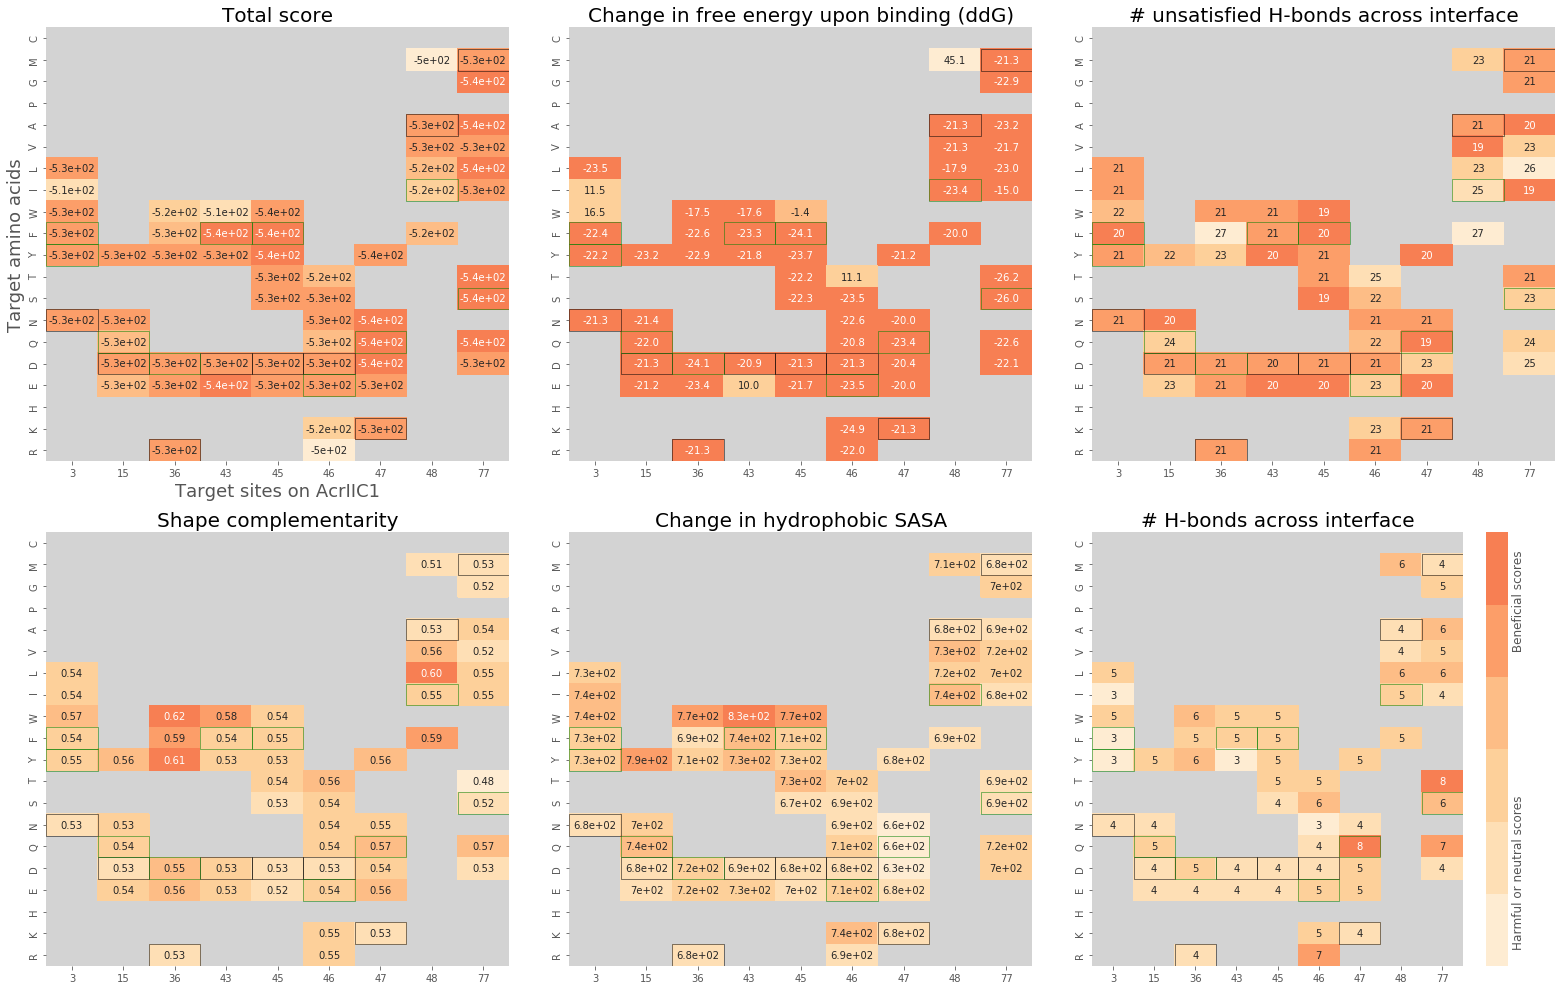

In [35]:
fig = plt.figure(figsize=[22, 14])
grid = (2, 3)
ax1 = plt.subplot2grid(grid, (0, 0))
ax2 = plt.subplot2grid(grid, (0, 1), sharex=ax1, sharey=ax1)
ax3 = plt.subplot2grid(grid, (0, 2), sharex=ax1, sharey=ax1)
ax4 = plt.subplot2grid(grid, (1, 0), sharex=ax1, sharey=ax1)
ax5 = plt.subplot2grid(grid, (1, 1), sharex=ax1, sharey=ax1)
ax6 = plt.subplot2grid(grid, (1, 2), sharex=ax1, sharey=ax1)

#ax4 = plt.subplot2grid(grid, (1, 0), fig=fig, colspan=3)
cmap = sns.color_palette("OrRd", 10)[:6]#sns.diverging_palette(220, 20, n=7)
cmapr = sns.color_palette("OrRd_r", 10)[4:]
cbar_kws = {'format': '%.0f%%', 'ticks': [0, 100], 'label': 'Harmful or neutral scores                                     Beneficial scores'}

## Reverse cmap, i.e. lower scores are good
g = sns.heatmap(mat_score, cmap=cmapr, annot=True, ax=ax1, cbar=False)
g.set_facecolor('lightgrey')
for e in rectangle_map:
    ax1.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='black', lw=.5))
for e in rectangle_map2:
    ax1.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='green', lw=.5))    
#rectangle_score = get_boundary(mat_ddg_full, residue_map, alphabet_map_full, bound='min')
#for e in rectangle_score:
    #ax1.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='red', lw=5)) 
ax1.set_title('Total score', fontsize=20)
ax1.set_ylabel('Target amino acids', fontsize=18)
ax1.set_xlabel('Target sites on AcrIIC1', fontsize=18)

g = sns.heatmap(mat_ddg, cmap=cmapr, annot=True, ax=ax2, cbar=False, fmt=".1f")
g.set_facecolor('lightgrey')
for e in rectangle_map:
    ax2.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='black', lw=.5))
for e in rectangle_map2:
    ax2.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='green', lw=.5))    
#rectangle_score = get_boundary(mat_ddg_full, residue_map, alphabet_map_full, bound='min')
#for e in rectangle_score:
    #ax1.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='red', lw=5)) 
ax2.set_title('Change in free energy upon binding (ddG)', fontsize=20)
ax2.set_ylabel('')
ax2.set_xlabel('')

g = sns.heatmap(mat_uhb, cmap=cmapr, annot=True, ax=ax3, cbar=False) #cbar_kws=cbar_kws
g.set_facecolor('lightgrey')
for e in rectangle_map:
    ax3.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='black', lw=.5))
for e in rectangle_map2:
    ax3.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='green', lw=.5))    
#rectangle_score = get_boundary(mat_ddg_full, residue_map, alphabet_map_full, bound='min')
#for e in rectangle_score:
    #ax1.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='red', lw=5)) 
ax3.set_title('# unsatisfied H-bonds across interface', fontsize=20)
ax3.set_ylabel('')
ax3.set_xlabel('')

## Forward heatmaps, i.e. higher scores are good
g = sns.heatmap(mat_sc, cmap=cmap, annot=True, ax=ax4, cbar=False, fmt=".2f")
g.set_facecolor('lightgrey')
for e in rectangle_map:
    ax4.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='black', lw=.5))
for e in rectangle_map2:
    ax4.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='green', lw=.5))
#rectangle_score = get_boundary(mat_sc_full, residue_map, alphabet_map_full, bound='max')
#for e in rectangle_score:
#    ax2.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='red', lw=5)) 
ax4.set_title('Shape complementarity', fontsize=20)
ax4.set_ylabel('')
ax4.set_xlabel('')


g = sns.heatmap(mat_hphobic, cmap=cmap, annot=True, ax=ax5, cbar=False)
g.set_facecolor('lightgrey')
for e in rectangle_map:
    ax5.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='black', lw=.5))
for e in rectangle_map2:
    ax5.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='green', lw=.5))
#rectangle_score = get_boundary(mat_uhb_full, residue_map, alphabet_map_full, bound='min')
#for e in rectangle_score:
#    ax3.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='red', lw=5)) 
ax5.set_title('Change in hydrophobic SASA', fontsize=20)
ax5.set_ylabel('')
ax5.set_xlabel('')

g = sns.heatmap(mat_hbond, cmap=cmap, annot=True, ax=ax6, cbar=True, cbar_kws=cbar_kws,)
g.set_facecolor('lightgrey')
for e in rectangle_map:
    ax6.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='black', lw=.5))
for e in rectangle_map2:
    ax6.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='green', lw=.5))
#rectangle_score = get_boundary(mat_uhb_full, residue_map, alphabet_map_full, bound='min')
#for e in rectangle_score:
#    ax3.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='red', lw=5)) 
ax6.set_title('# H-bonds across interface', fontsize=20) 
ax6.set_ylabel('')
ax6.set_xlabel('')

plt.tight_layout()

plt.savefig('/Users/hartevel/Desktop/maps_for_compflow.svg', dpi=300, transparent=False)
plt.show()

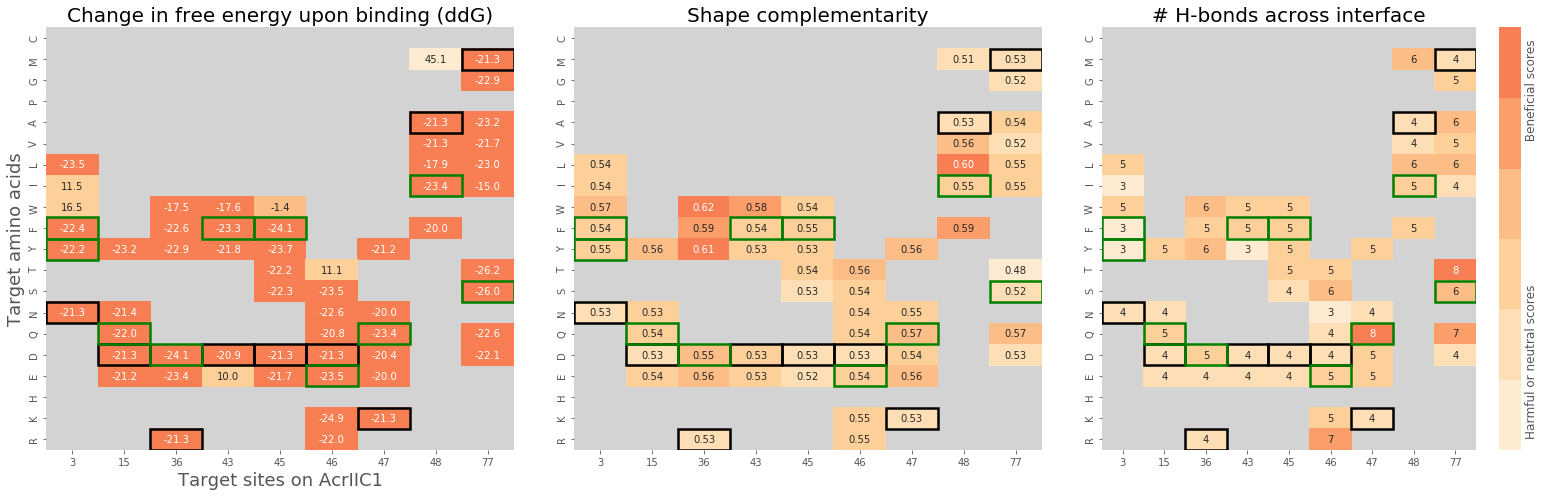

In [32]:
fig = plt.figure(figsize=[22, 7])
grid = (1, 3)
ax1 = plt.subplot2grid(grid, (0, 0))
ax2 = plt.subplot2grid(grid, (0, 1), sharex=ax1, sharey=ax1)
ax3 = plt.subplot2grid(grid, (0, 2), sharex=ax1, sharey=ax1)

#ax4 = plt.subplot2grid(grid, (1, 0), fig=fig, colspan=3)
cmap = sns.color_palette("OrRd", 10)[:6]#sns.diverging_palette(220, 20, n=7)
cmapr = sns.color_palette("OrRd_r", 10)[4:]
cbar_kws = {'format': '%.0f%%', 'ticks': [0, 100], 'label': 'Harmful or neutral scores                                     Beneficial scores'}

## Reverse cmap, i.e. lower scores are good
g = sns.heatmap(mat_ddg, cmap=cmapr, annot=True, ax=ax1, cbar=False, fmt=".1f")
g.set_facecolor('lightgrey')
for e in rectangle_map:
    ax1.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='black', lw=2.5))
for e in rectangle_map2:
    ax1.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='green', lw=2.5))    
#rectangle_score = get_boundary(mat_ddg_full, residue_map, alphabet_map_full, bound='min')
#for e in rectangle_score:
    #ax1.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='red', lw=5)) 
ax1.set_title('Change in free energy upon binding (ddG)', fontsize=20)
ax1.set_ylabel('Target amino acids', fontsize=18)
ax1.set_xlabel('Target sites on AcrIIC1', fontsize=18)

## Forward heatmaps, i.e. higher scores are good
g = sns.heatmap(mat_sc, cmap=cmap, annot=True, ax=ax2, cbar=False, fmt=".2f")
g.set_facecolor('lightgrey')
for e in rectangle_map:
    ax2.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='black', lw=2.5))
for e in rectangle_map2:
    ax2.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='green', lw=2.5))
#rectangle_score = get_boundary(mat_sc_full, residue_map, alphabet_map_full, bound='max')
#for e in rectangle_score:
#    ax2.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='red', lw=5)) 
ax2.set_title('Shape complementarity', fontsize=20)
ax2.set_ylabel('')
ax2.set_xlabel('')

g = sns.heatmap(mat_hbond, cmap=cmap, annot=True, ax=ax3, cbar=True, cbar_kws=cbar_kws,)
g.set_facecolor('lightgrey')
for e in rectangle_map:
    ax3.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='black', lw=2.5))
for e in rectangle_map2:
    ax3.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='green', lw=2.5))
#rectangle_score = get_boundary(mat_uhb_full, residue_map, alphabet_map_full, bound='min')
#for e in rectangle_score:
#    ax3.add_patch(Rectangle((e[1], e[0]), 1, 1, fill=False, edgecolor='red', lw=5)) 
ax3.set_title('# H-bonds across interface', fontsize=20) 
ax3.set_ylabel('')
ax3.set_xlabel('')

plt.tight_layout()

plt.savefig('/Users/hartevel/Desktop/maps_reduced.svg', dpi=300, transparent=False)
plt.show()